In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import warnings

warnings.filterwarnings('ignore')

## Load Dataset and Rename Columns


In [34]:
data_df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')
data_df.rename(columns={
    'Transaction Date': 'txn_date',
    'Transaction Amount': 'txn_amt',
    'Customer Age': 'cust_age',
    'Account Age Days': 'acct_age_days',
    'Transaction Hour': 'txn_hour',
    'Payment Method': 'payment_method',
    'Product Category': 'prod_cat',
    'Device Used': 'device_used',
    'Is Fraudulent': 'fraudulent',
    'Quantity': 'qty'
}, inplace=True)
print("Max transaction date:", data_df['txn_date'].max())

Max transaction date: 2024-04-07 08:54:03


## Basic Data Exploration

In [35]:
display(data_df.head())
display(data_df.describe())

print(data_df[data_df['cust_age'] < 0].groupby('fraudulent')['cust_age'].count())

data_df.info()

num_vars = data_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_vars.corr()
display(corr_matrix)

print(data_df['fraudulent'].value_counts(normalize=True))

,Transaction ID,Customer ID,txn_amt,txn_date,payment_method,prod_cat,qty,cust_age,Customer Location,device_used,IP Address,Shipping Address,Billing Address,fraudulent,acct_age_days,txn_hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


,txn_amt,qty,cust_age,fraudulent,acct_age_days,txn_hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


fraudulent
0    1
Name: cust_age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction ID     23634 non-null  object 
 1   Customer ID        23634 non-null  object 
 2   txn_amt            23634 non-null  float64
 3   txn_date           23634 non-null  object 
 4   payment_method     23634 non-null  object 
 5   prod_cat           23634 non-null  object 
 6   qty                23634 non-null  int64  
 7   cust_age           23634 non-null  int64  
 8   Customer Location  23634 non-null  object 
 9   device_used        23634 non-null  object 
 10  IP Address         23634 non-null  object 
 11  Shipping Address   23634 non-null  object 
 12  Billing Address    23634 non-null  object 
 13  fraudulent         23634 non-null  int64  
 14  acct_age_days      23634 non-null  int64  
 15  txn_hour           2363

,txn_amt,qty,cust_age,fraudulent,acct_age_days,txn_hour
txn_amt,1.000000,0.008426,-0.008015,0.275459,-0.044580,-0.028962
qty,0.008426,1.000000,-0.000445,-0.005340,-0.004549,0.004059
cust_age,-0.008015,-0.000445,1.000000,0.004819,-0.012201,0.003518
fraudulent,0.275459,-0.005340,0.004819,1.000000,-0.142467,-0.122226
acct_age_days,-0.044580,-0.004549,-0.012201,-0.142467,1.000000,0.024355
txn_hour,-0.028962,0.004059,0.003518,-0.122226,0.024355,1.000000


fraudulent
0    0.948295
1    0.051705
Name: proportion, dtype: float64


## Visualize Fraud Distribution and Correlation

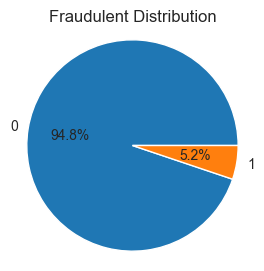

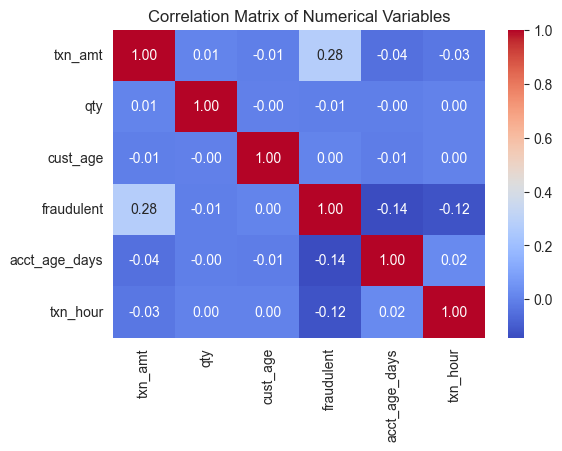

In [36]:
plt.figure(figsize=(3, 3))
plt.pie(data_df['fraudulent'].value_counts(), labels=data_df['fraudulent'].unique(), autopct='%1.1f%%')
plt.title('Fraudulent Distribution')
plt.axis('equal')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Histograms for Continuous Features

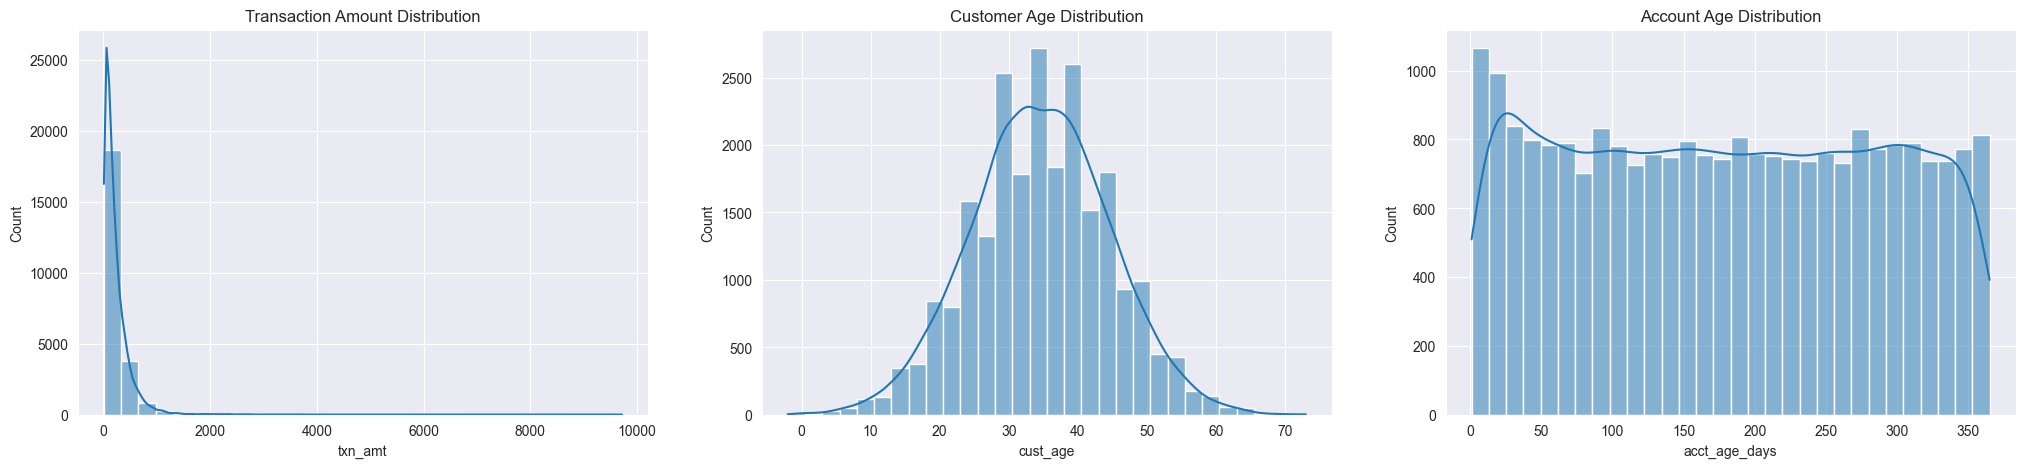

In [37]:
plt.subplots(1, 3, figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.histplot(data_df['txn_amt'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data_df['cust_age'], bins=30, kde=True)
plt.title('Customer Age Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data_df['acct_age_days'], bins=30, kde=True)
plt.title('Account Age Distribution')

plt.show()

## Count Plots and Pie Charts for Categorical Features

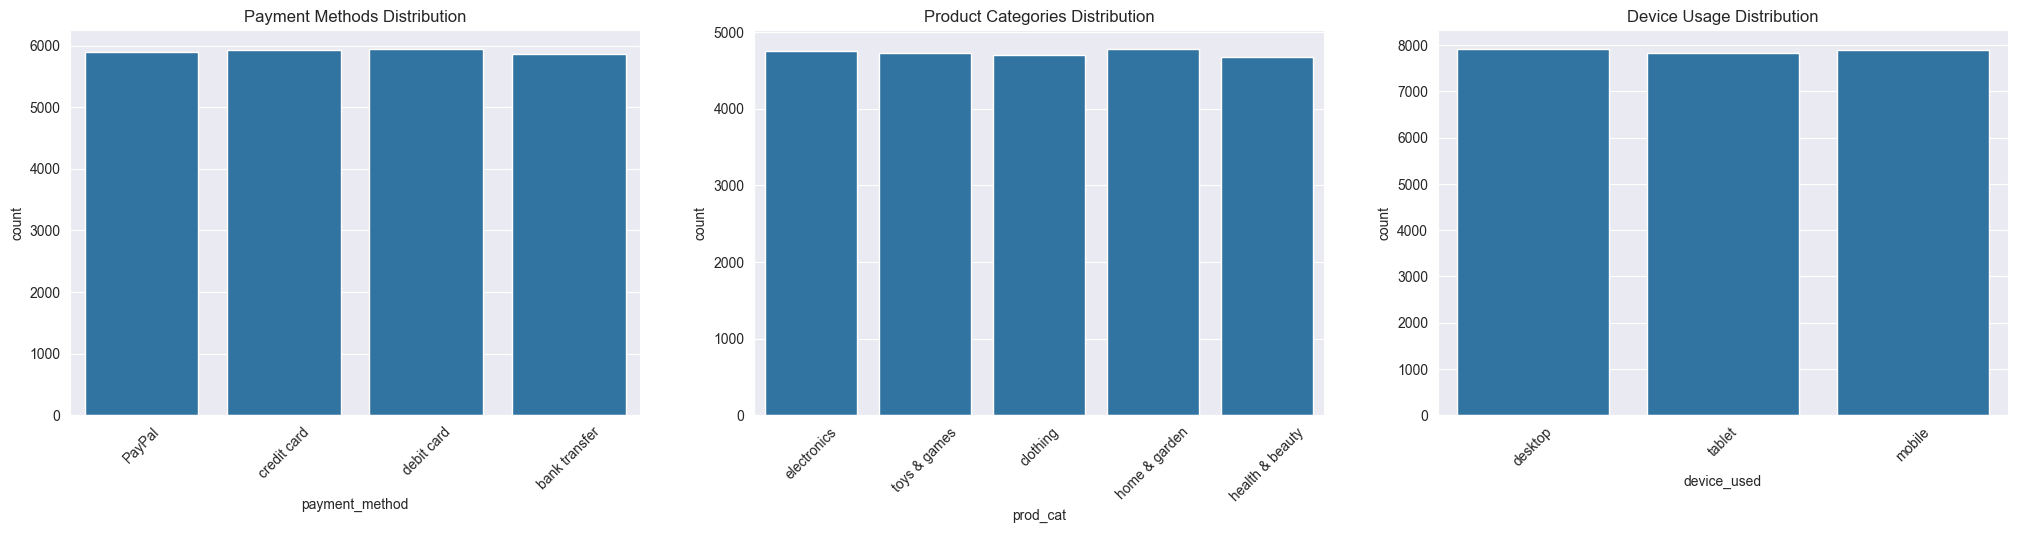

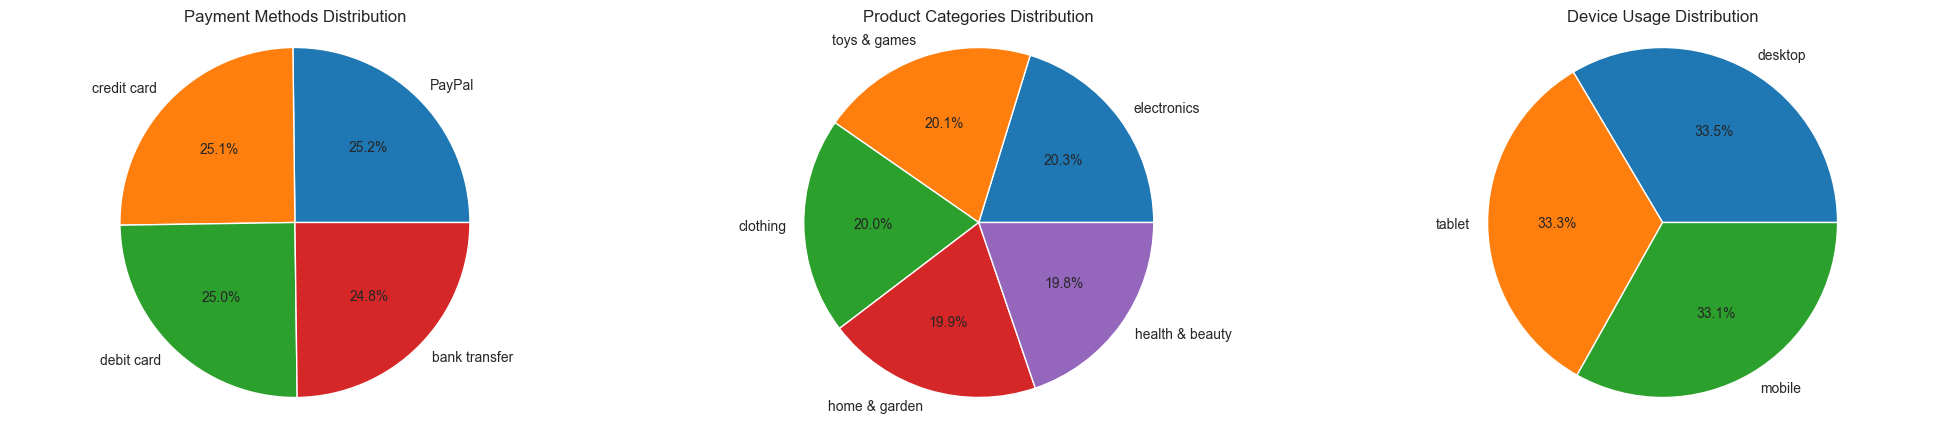

In [38]:
plt.subplots(1, 3, figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='payment_method', data=data_df)
plt.title('Payment Methods Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='prod_cat', data=data_df)
plt.title('Product Categories Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.countplot(x='device_used', data=data_df)
plt.title('Device Usage Distribution')
plt.xticks(rotation=45)

plt.show()

plt.subplots(1, 3, figsize=(25, 5))

plt.subplot(1, 3, 1)
plt.pie(data_df['payment_method'].value_counts(), labels=data_df['payment_method'].unique(), autopct='%1.1f%%')
plt.title('Payment Methods Distribution')
plt.axis('equal')

plt.subplot(1, 3, 2)
plt.pie(data_df['prod_cat'].value_counts(), labels=data_df['prod_cat'].unique(), autopct='%1.1f%%')
plt.title('Product Categories Distribution')
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.pie(data_df['device_used'].value_counts(), labels=data_df['device_used'].unique(), autopct='%1.1f%%')
plt.title('Device Usage Distribution')
plt.axis('equal')

plt.show()

## Boxplots by Fraud Class

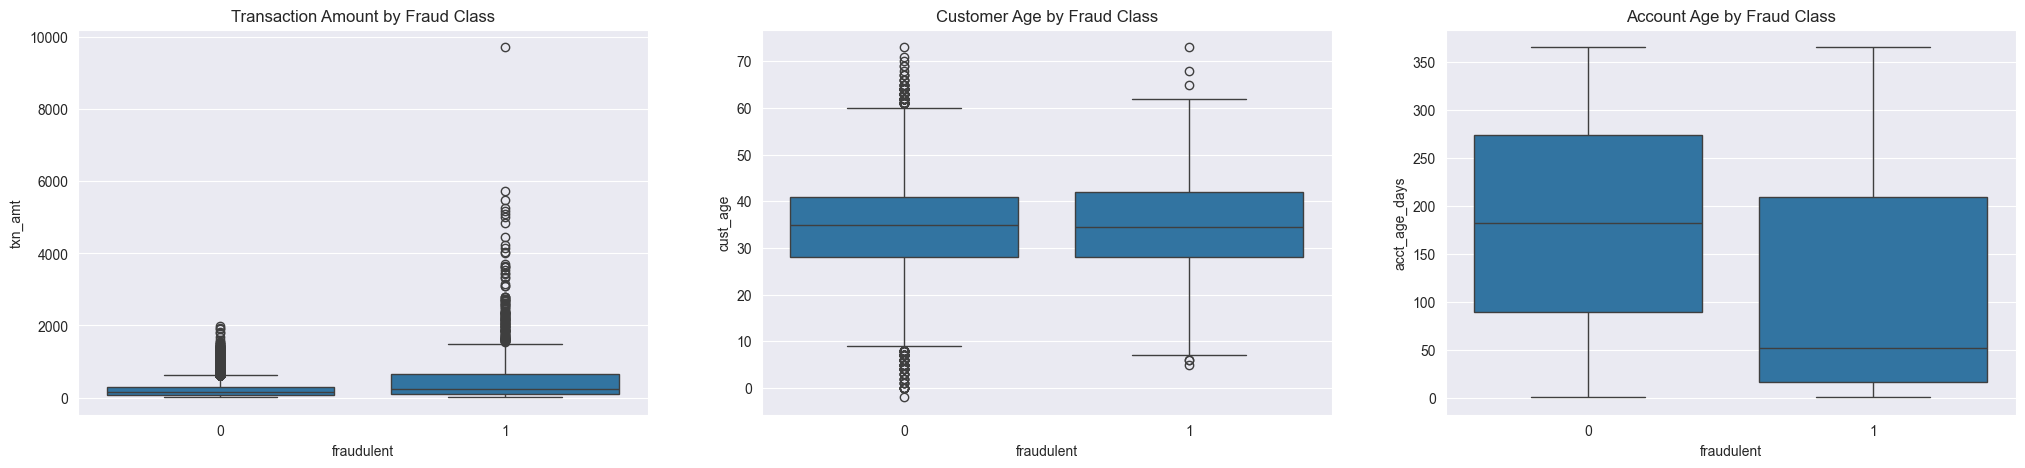

In [39]:
plt.subplots(1, 3, figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='fraudulent', y='txn_amt', data=data_df)
plt.title('Transaction Amount by Fraud Class')

plt.subplot(1, 3, 2)
sns.boxplot(x='fraudulent', y='cust_age', data=data_df)
plt.title('Customer Age by Fraud Class')

plt.subplot(1, 3, 3)
sns.boxplot(x='fraudulent', y='acct_age_days', data=data_df)
plt.title('Account Age by Fraud Class')

plt.show()

## Fraud Analysis by Time and Age Groups

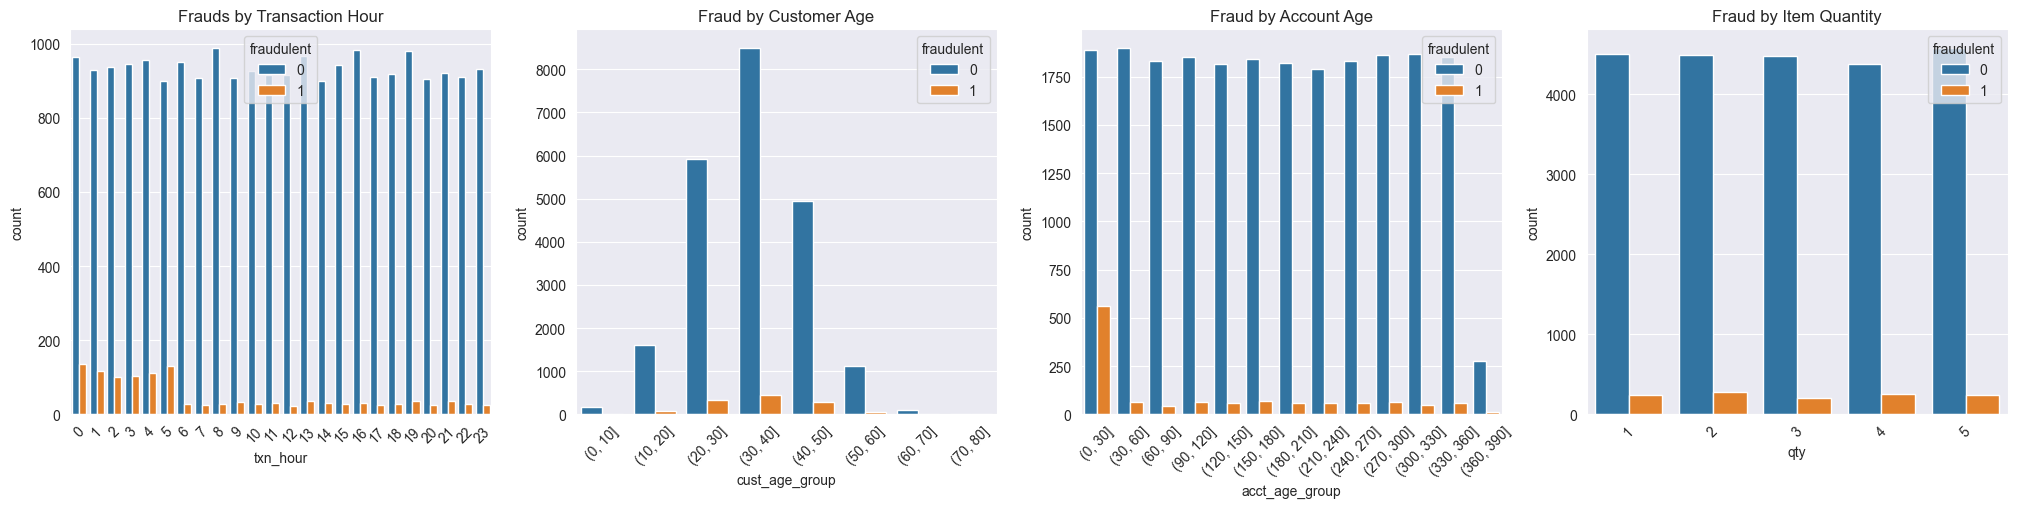

In [40]:
plt.subplots(1, 4, figsize=(25, 5))

plt.subplot(1, 4, 1)
sns.countplot(x='txn_hour', data=data_df, hue='fraudulent')
plt.title('Frauds by Transaction Hour')
plt.xticks(rotation=45)

plt.subplot(1, 4, 2)
bin_width = 10
data_df['cust_age_group'] = pd.cut(data_df['cust_age'], bins=range(0, int(data_df['cust_age'].max()) + bin_width, bin_width))
data_df['cust_age_group'] = pd.Categorical(data_df['cust_age_group'])
sns.countplot(x='cust_age_group', hue='fraudulent', data=data_df)
plt.title('Fraud by Customer Age')
plt.xticks(rotation=45)

plt.subplot(1, 4, 3)
acct_bin_width = 30
data_df['acct_age_group'] = pd.cut(data_df['acct_age_days'], bins=range(0, int(data_df['acct_age_days'].max()) + acct_bin_width, acct_bin_width))
data_df['acct_age_group'] = pd.Categorical(data_df['acct_age_group'])
sns.countplot(x='acct_age_group', hue='fraudulent', data=data_df)
plt.title('Fraud by Account Age')
plt.xticks(rotation=45)

plt.subplot(1, 4, 4)
sns.countplot(x='qty', data=data_df, hue='fraudulent')
plt.title('Fraud by Item Quantity')
plt.xticks(rotation=45)

plt.show()

## Additional Categorical Analysis

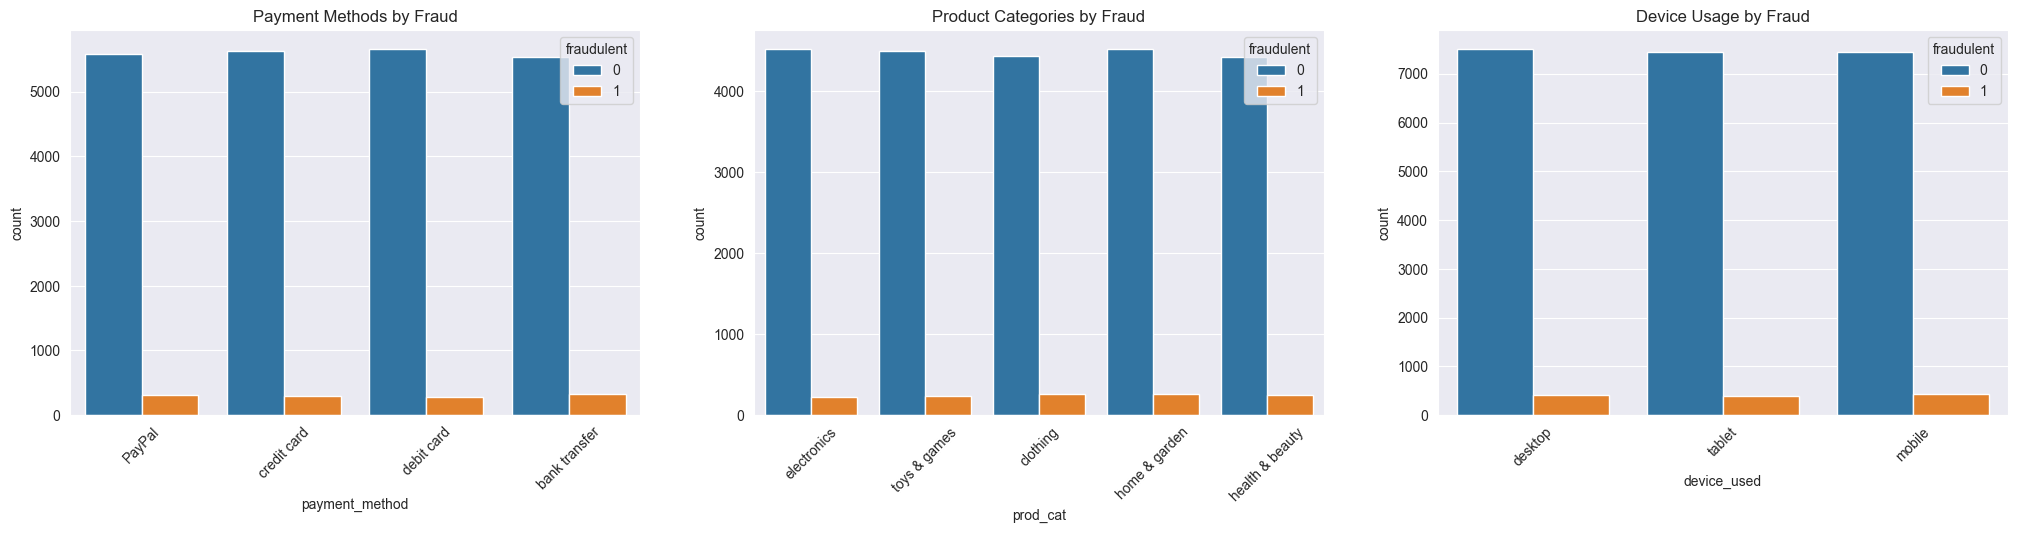

In [41]:
plt.subplots(1, 3, figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='payment_method', hue='fraudulent', data=data_df)
plt.title('Payment Methods by Fraud')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='prod_cat', hue='fraudulent', data=data_df)
plt.title('Product Categories by Fraud')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.countplot(x='device_used', hue='fraudulent', data=data_df)
plt.title('Device Usage by Fraud')
plt.xticks(rotation=45)

plt.show()

## Time Series Analysis

/var/folders/m9/j_f2l_vj2z7g3kfr4wpbp3h40000gn/T/ipykernel_49755/617777987.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df.resample('M')['fraudulent'].sum().plot()


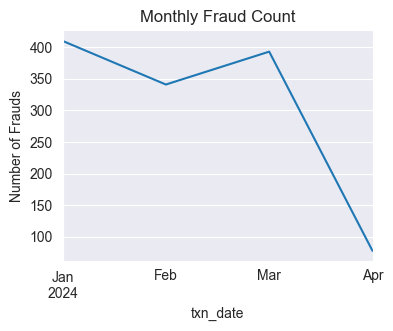

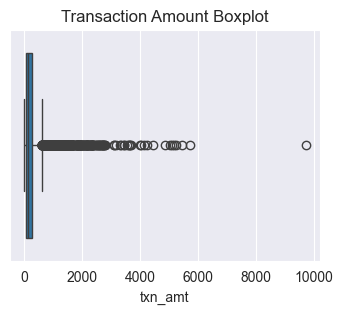

In [42]:
data_df['txn_date'] = pd.to_datetime(data_df['txn_date'])
data_df.set_index('txn_date', inplace=True)

plt.figure(figsize=(4, 3))
data_df.resample('M')['fraudulent'].sum().plot()
plt.title('Monthly Fraud Count')
plt.ylabel('Number of Frauds')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=data_df['txn_amt'])
plt.title('Transaction Amount Boxplot')
plt.show()

## Outlier Detection and Visualization

Detected outliers:
                     txn_amt  txn_amt_zscore
txn_date                                    
2024-02-26 19:24:48  1134.98        3.210930
2024-03-28 11:15:42  1213.92        3.490819
2024-02-21 15:04:45  1465.65        4.383349
2024-03-30 18:56:53  2708.30        8.789274
2024-01-09 19:28:42  1140.01        3.228764
...                      ...             ...
2024-04-01 16:00:17  1152.89        3.274431
2024-03-04 07:15:50  1261.70        3.660227
2024-03-20 23:40:23  1363.65        4.021699
2024-02-18 00:12:47  2728.20        8.859831
2024-03-09 04:36:06  1264.39        3.669764

[309 rows x 2 columns]


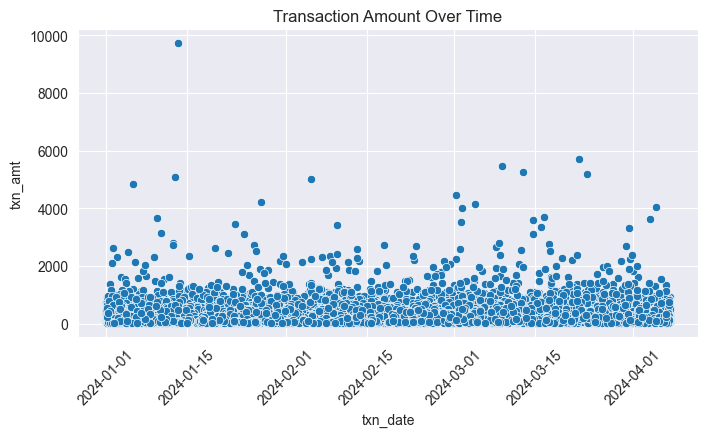

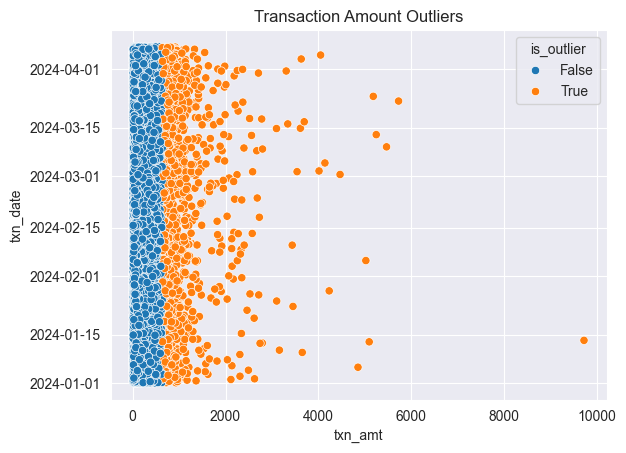

In [43]:
data_df['txn_amt_zscore'] = zscore(data_df['txn_amt'])
outliers = data_df[np.abs(data_df['txn_amt_zscore']) > 3]
print("Detected outliers:")
print(outliers[['txn_amt', 'txn_amt_zscore']])

plt.figure(figsize=(8, 4))
sns.scatterplot(x=data_df.index, y='txn_amt', data=data_df)
plt.title('Transaction Amount Over Time')
plt.xticks(rotation=45)
plt.show()

Q1 = data_df['txn_amt'].quantile(0.25)
Q3 = data_df['txn_amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_copy = data_df.copy(deep=True)
data_copy['is_outlier'] = ((data_df['txn_amt_zscore'].abs() > 3) | 
                           (data_df['txn_amt'] < lower_bound) | 
                           (data_df['txn_amt'] > upper_bound))

data_copy_reset = data_copy.reset_index()
sns.scatterplot(x='txn_amt', y='txn_date', hue='is_outlier', data=data_copy_reset)
plt.title('Transaction Amount Outliers')
plt.show()

## Box Plots for Selected Features

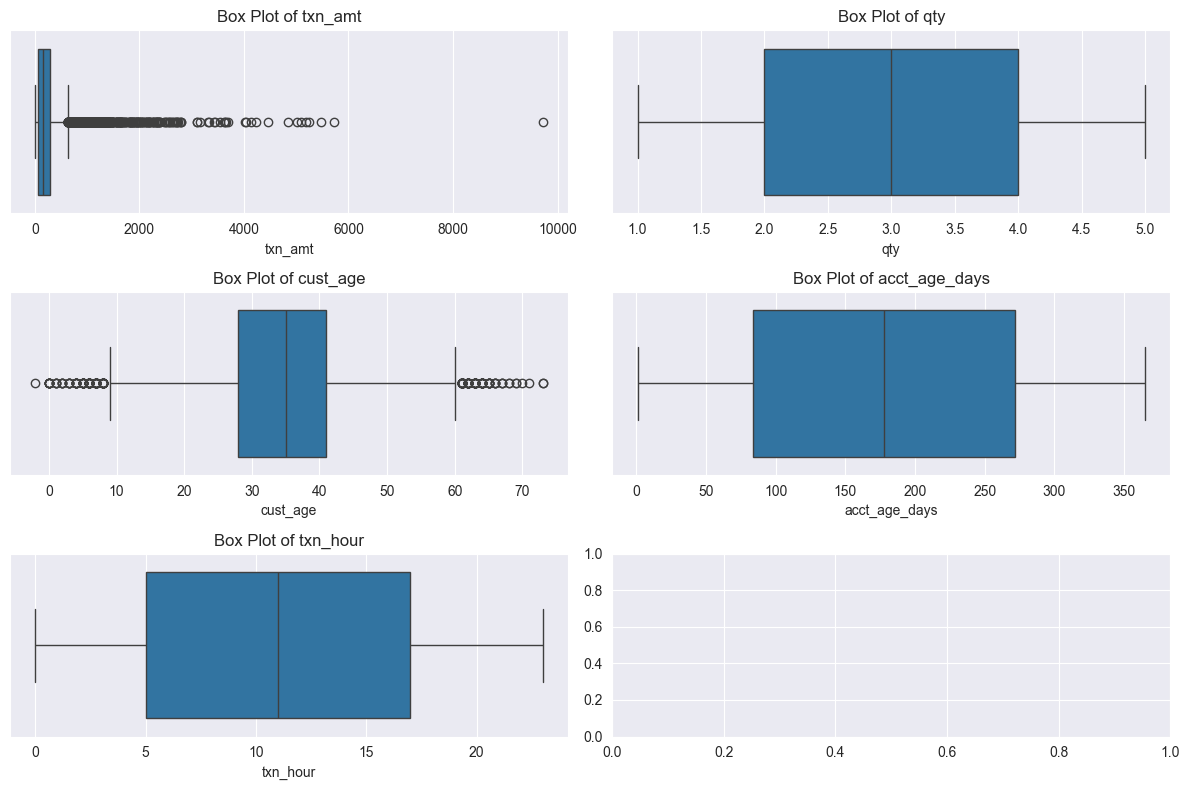

In [44]:
feature_list = ['txn_amt', 'qty', 'cust_age', 'acct_age_days', 'txn_hour']
fig, axarr = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axarr = axarr.flatten()

for i, col in enumerate(feature_list):
    sns.boxplot(x=col, data=data_df, ax=axarr[i])
    axarr[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Reload and Preprocess Raw Data

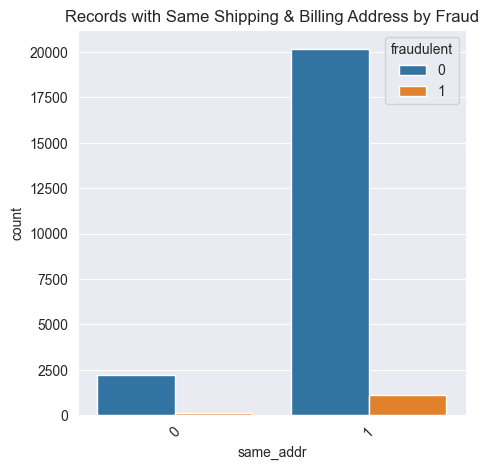

In [45]:
raw_data = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')

raw_data.rename(columns={
    'Transaction Date': 'txn_date',
    'Transaction Amount': 'txn_amt',
    'Customer Age': 'cust_age',
    'Account Age Days': 'acct_age_days',
    'Transaction Hour': 'txn_hour',
    'Payment Method': 'payment_method',
    'Product Category': 'prod_cat',
    'Device Used': 'device_used',
    'Is Fraudulent': 'fraudulent',
    'Quantity': 'qty',
    'Transaction ID': 'txn_id',
    'Customer ID': 'cust_id',
    'Customer Location': 'cust_loc',
    'IP Address': 'ip_addr',
    'Shipping Address': 'ship_addr',
    'Billing Address': 'bill_addr'
}, inplace=True)

raw_data['same_addr'] = (raw_data['ship_addr'] == raw_data['bill_addr']).astype(int)

plt.figure(figsize=(5, 5))
sns.countplot(x='same_addr', hue='fraudulent', data=raw_data)
plt.title('Records with Same Shipping & Billing Address by Fraud')
plt.xticks(rotation=45)
plt.show()

## Final Data Cleaning and Dummy Variable Conversion

In [46]:
processed_data = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')

processed_data.rename(columns={
    'Transaction Date': 'txn_date',
    'Transaction Amount': 'txn_amt',
    'Customer Age': 'cust_age',
    'Account Age Days': 'acct_age_days',
    'Transaction Hour': 'txn_hour',
    'Payment Method': 'payment_method',
    'Product Category': 'prod_cat',
    'Device Used': 'device_used',
    'Is Fraudulent': 'fraudulent',
    'Quantity': 'qty',
    'Transaction ID': 'txn_id',
    'Customer ID': 'cust_id',
    'Customer Location': 'cust_loc',
    'IP Address': 'ip_addr',
    'Shipping Address': 'ship_addr',
    'Billing Address': 'bill_addr'
}, inplace=True)


processed_data['same_addr'] = (processed_data['ship_addr'] == processed_data['bill_addr']).astype(int)

processed_data = processed_data.drop(columns=['txn_id', 'cust_id', 'txn_date', 'cust_loc', 'ip_addr', 'ship_addr', 'bill_addr'])

processed_data = processed_data.drop(processed_data[processed_data['cust_age'] < 16].index)

processed_data = pd.get_dummies(processed_data, drop_first=True, dtype=int)
display(processed_data.head())

,txn_amt,qty,cust_age,fraudulent,acct_age_days,txn_hour,same_addr,payment_method_bank transfer,payment_method_credit card,payment_method_debit card,prod_cat_electronics,prod_cat_health & beauty,prod_cat_home & garden,prod_cat_toys & games,device_used_mobile,device_used_tablet
0,42.32,1,40,0,282,23,1,0,0,0,1,0,0,0,0,0
1,301.34,3,35,0,223,0,1,0,1,0,1,0,0,0,0,1
2,340.32,5,29,0,360,8,0,0,0,1,0,0,0,1,0,0
3,95.77,5,45,0,325,20,1,0,1,0,1,0,0,0,1,0
4,77.45,5,42,0,116,15,1,0,1,0,0,0,0,0,0,0


## Data Splitting

In [47]:
X = processed_data.drop('fraudulent', axis=1)
y = processed_data['fraudulent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

## Import Libraries and Define Pipeline

In [48]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import recall_score, f1_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import joblib

model_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resampler', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
    ('clf', None)
])

scoring_metrics = {'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}

param_dist = {
    'clf': [AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)],
    'clf__n_estimators': randint(50, 200),
    'clf__learning_rate': uniform(0.1, 1.5)
}

## Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
search_model = RandomizedSearchCV(
    model_pipeline,
    param_distributions=param_dist,
    n_iter=100,
    scoring=scoring_metrics,
    refit='f1',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=10,
    random_state=42,
    n_jobs=-1
)

search_model.fit(X_train, y_train)

## Training Evaluation


Best Parameters:
clf: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)
clf__learning_rate: 1.5092484123462837
clf__n_estimators: 369

Training Evaluation Metrics:


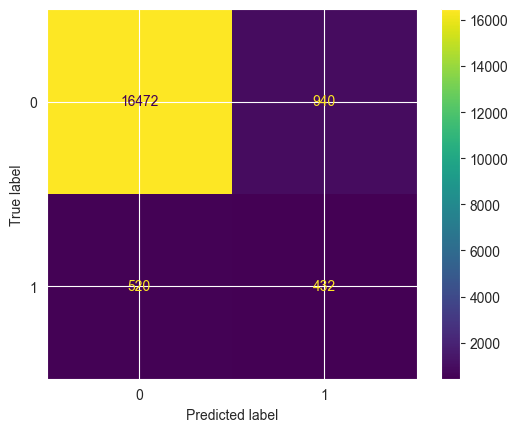

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17412
           1       0.31      0.45      0.37       952

    accuracy                           0.92     18364
   macro avg       0.64      0.70      0.66     18364
weighted avg       0.94      0.92      0.93     18364



In [52]:
print('\nBest Parameters:')
for key, value in search_model.best_params_.items():
    print(f'{key}: {value}')

print("\nTraining Evaluation Metrics:")
train_preds = search_model.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, train_preds)
plt.show()
print(classification_report(y_train, train_preds))

## Test Evaluation


Test Evaluation Metrics:


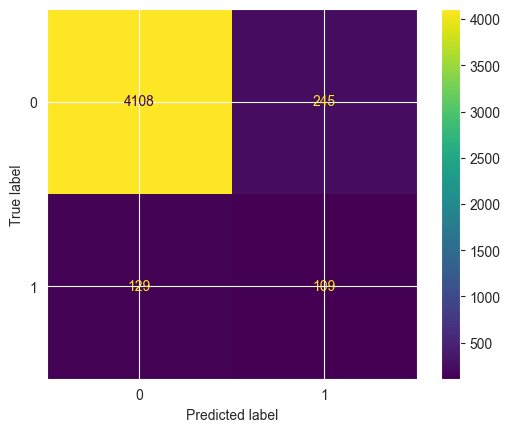

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      4353
           1       0.31      0.46      0.37       238

    accuracy                           0.92      4591
   macro avg       0.64      0.70      0.66      4591
weighted avg       0.94      0.92      0.93      4591



In [53]:
print("\nTest Evaluation Metrics:")
test_preds = search_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds)
plt.show()
print(classification_report(y_test, test_preds))

## Save Model

In [55]:
joblib.dump(search_model, 'fraud_detection_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [56]:
print(search_model.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('resampler',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                ('clf',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=np.float64(1.5092484123462837),
                                    n_estimators=369, random_state=42))])
